In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import warnings
%matplotlib inline

import os
for dirname, _, filenames in os.walk("C:/Users/kunda/Downloads/layoffs.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
df = pd.read_csv("C:/Users/kunda/Downloads/layoffs.csv")

In [5]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,ShareChat,Bengaluru,Consumer,100.0,NaN,2022-12-02,Unknown,India,1700.0
1,Carousell,Singapore,Retail,110.0,0.10,2022-12-01,Private Equity,Singapore,372.0
2,Bizzabo,New York City,Marketing,100.0,0.37,2022-12-01,Series E,United States,194.0
3,BloomTech,SF Bay Area,Education,88.0,0.50,2022-12-01,Unknown,United States,NaN
4,Podium,Lehi,Support,NaN,0.12,2022-12-01,Series D,United States,419.0
...,...,...,...,...,...,...,...,...,...
1718,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1719,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1720,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
1721,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0


In [6]:
df.isnull().sum()

company                  0
location                 0
industry                 5
total_laid_off         511
percentage_laid_off    569
date                     1
stage                    4
country                  0
funds_raised           124
dtype: int64

In [7]:
df = df.fillna(0)
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,ShareChat,Bengaluru,Consumer,100.0,0.00,2022-12-02,Unknown,India,1700.0
1,Carousell,Singapore,Retail,110.0,0.10,2022-12-01,Private Equity,Singapore,372.0
2,Bizzabo,New York City,Marketing,100.0,0.37,2022-12-01,Series E,United States,194.0
3,BloomTech,SF Bay Area,Education,88.0,0.50,2022-12-01,Unknown,United States,0.0
4,Podium,Lehi,Support,0.0,0.12,2022-12-01,Series D,United States,419.0
...,...,...,...,...,...,...,...,...,...
1718,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1719,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1720,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
1721,EasyPost,Salt Lake City,Logistics,75.0,0.00,2020-03-11,Series A,United States,12.0


In [8]:
df.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1723 non-null   object 
 1   location             1723 non-null   object 
 2   industry             1723 non-null   object 
 3   total_laid_off       1723 non-null   float64
 4   percentage_laid_off  1723 non-null   float64
 5   date                 1723 non-null   object 
 6   stage                1723 non-null   object 
 7   country              1723 non-null   object 
 8   funds_raised         1723 non-null   float64
dtypes: float64(3), object(6)
memory usage: 121.3+ KB


In [10]:
df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1723.000000,1723.000000,1723.000000
mean,139.000580,0.185489,807.973474
std,487.192115,0.254516,6171.837712
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000
50%,39.000000,0.100000,114.000000
75%,100.000000,0.250000,343.000000
max,11000.000000,1.000000,121900.000000


In [11]:
grouped = df.groupby(by = "country").mean() 
grouped = df.groupby(by = "company").mean()
grouped = df.groupby(by = "location").mean()
grouped = df.groupby(by = "industry").mean()

<AxesSubplot:>

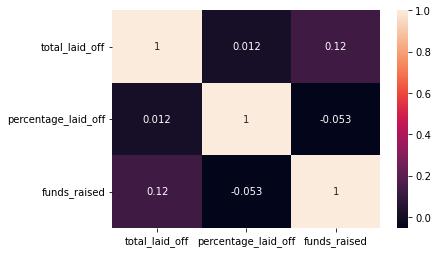

In [12]:
import seaborn as sns
sns.heatmap(df.corr(),  annot = True)

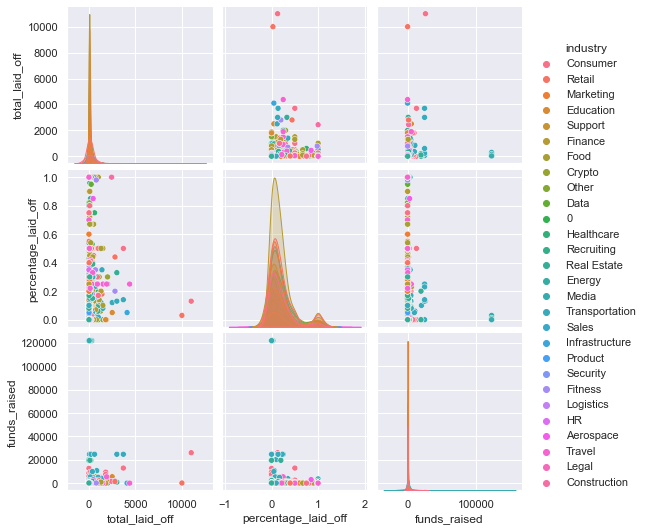

In [13]:
sns.set_theme(style = "darkgrid")
sns.pairplot(df, hue ="industry")

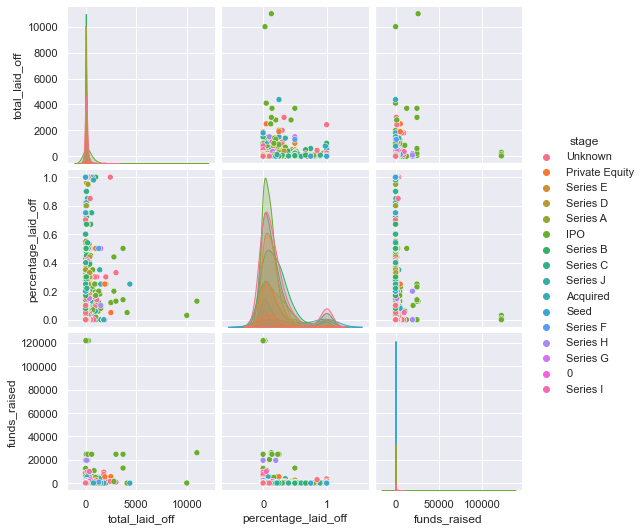

In [14]:
sns.set_theme(style = "darkgrid")
sns.pairplot(df, hue = "stage")

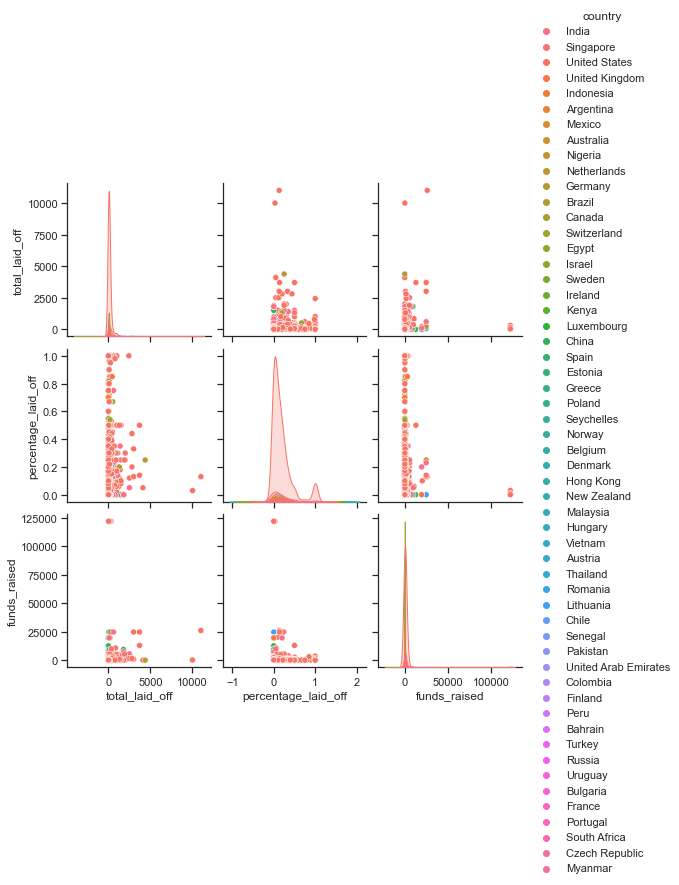

In [15]:
sns.set_theme(style = "ticks")
sns.pairplot(df, hue = "country") 

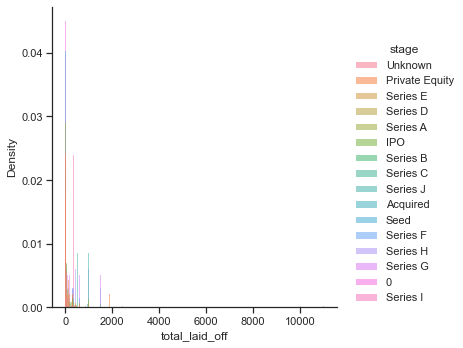

In [16]:
sns.displot(df, x= "total_laid_off",  hue = "stage", stat = "density", common_norm = False )

In [20]:
df.value_counts().sum()

1723

In [21]:
numerical_cols = df._get_numeric_data().columns
categorical_cols = list(set(df.columns)-set(numerical_cols))
categorical_cols

['stage', 'location', 'country', 'industry', 'company', 'date']

In [22]:
df_new = df.drop('date', axis =1)
df_new = df_new.drop("company", axis = 1) 
df_new

,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
0,Bengaluru,Consumer,100.0,0.00,Unknown,India,1700.0
1,Singapore,Retail,110.0,0.10,Private Equity,Singapore,372.0
2,New York City,Marketing,100.0,0.37,Series E,United States,194.0
3,SF Bay Area,Education,88.0,0.50,Unknown,United States,0.0
4,Lehi,Support,0.0,0.12,Series D,United States,419.0
...,...,...,...,...,...,...,...
1718,Los Angeles,Transportation,8.0,0.10,Unknown,United States,45.0
1719,SF Bay Area,Consumer,6.0,0.75,Seed,United States,1.0
1720,Los Angeles,Retail,20.0,0.40,Series C,United States,90.0
1721,Salt Lake City,Logistics,75.0,0.00,Series A,United States,12.0


In [23]:
df_new["stage"].unique()

array(['Unknown', 'Private Equity', 'Series E', 'Series D', 'Series A',
       'IPO', 'Series B', 'Series C', 'Series J', 'Acquired', 'Seed',
       'Series F', 'Series H', 'Series G', 0, 'Series I'], dtype=object)

In [24]:
df_new["stage"] = df_new["stage"].replace({'Series D':1, 'Unknown':2, 'IPO':3, 'Series A':4, 'Series B':5, 'Series C':6,
       'Private Equity':7, 'Acquired':8, 'Series H':9, 'Series F':10, 'Series E':11,
       'Series G':12, 'Seed':13, 'Series J':14, 'Series I':15})
df_new

,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
0,Bengaluru,Consumer,100.0,0.00,2,India,1700.0
1,Singapore,Retail,110.0,0.10,7,Singapore,372.0
2,New York City,Marketing,100.0,0.37,11,United States,194.0
3,SF Bay Area,Education,88.0,0.50,2,United States,0.0
4,Lehi,Support,0.0,0.12,1,United States,419.0
...,...,...,...,...,...,...,...
1718,Los Angeles,Transportation,8.0,0.10,2,United States,45.0
1719,SF Bay Area,Consumer,6.0,0.75,13,United States,1.0
1720,Los Angeles,Retail,20.0,0.40,6,United States,90.0
1721,Salt Lake City,Logistics,75.0,0.00,4,United States,12.0


In [25]:
df_new['country'].unique()

array(['India', 'Singapore', 'United States', 'United Kingdom',
       'Indonesia', 'Argentina', 'Mexico', 'Australia', 'Nigeria',
       'Netherlands', 'Germany', 'Brazil', 'Canada', 'Switzerland',
       'Egypt', 'Israel', 'Sweden', 'Ireland', 'Kenya', 'Luxembourg',
       'China', 'Spain', 'Estonia', 'Greece', 'Poland', 'Seychelles',
       'Norway', 'Belgium', 'Denmark', 'Hong Kong', 'New Zealand',
       'Malaysia', 'Hungary', 'Vietnam', 'Austria', 'Thailand', 'Romania',
       'Lithuania', 'Chile', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Colombia', 'Finland', 'Peru', 'Bahrain',
       'Turkey', 'Russia', 'Uruguay', 'Bulgaria', 'France', 'Portugal',
       'South Africa', 'Czech Republic', 'Myanmar'], dtype=object)

In [26]:
df_new["country"] = df_new["country"].replace({'United States':1, 'Indonesia':2, 'India':3, 'Sweden':4, 'Greece':5,
       'Brazil':6, 'Poland':7, 'Germany':8, 'Israel':9, 'Seychelles':10, 'Norway':11,
       'Canada':12, 'United Kingdom':13, 'Belgium':14, 'Argentina':15, 'Netherlands':16,
       'Denmark':17, 'Hong Kong':18, 'Singapore':19, 'New Zealand':20, 'Australia':21,
       'Malaysia':22, 'Hungary':23, 'Vietnam':24, 'Egypt':25, 'Austria':26, 'Thailand':27,
       'Romania':28, 'Lithuania':29, 'Nigeria':30, 'Kenya':31, 'Chile':32, 'Luxembourg':33,
       'China':34, 'Senegal':35, 'Pakistan':36, 'United Arab Emirates':37, 'Colombia':38,
       'Finland':39, 'Peru':40, 'Ireland':41, 'Bahrain':42, 'Mexico':43, 'Turkey':44,
       'Russia':45, 'Uruguay':46, 'Bulgaria':47, 'France':48, 'Switzerland':49,
       'Estonia':50, 'Portugal':51, 'South Africa':52, 'Czech Republic':53, 'Myanmar':54,'Spain':55})
df_new["country"].unique()

array([ 3, 19,  1, 13,  2, 15, 43, 21, 30, 16,  8,  6, 12, 49, 25,  9,  4,
       41, 31, 33, 34, 55, 50,  5,  7, 10, 11, 14, 17, 18, 20, 22, 23, 24,
       26, 27, 28, 29, 32, 35, 36, 37, 38, 39, 40, 42, 44, 45, 46, 47, 48,
       51, 52, 53, 54], dtype=int64)

In [27]:
df_new["industry"].unique()

array(['Consumer', 'Retail', 'Marketing', 'Education', 'Support',
       'Finance', 'Food', 'Crypto', 'Other', 'Data', 0, 'Healthcare',
       'Recruiting', 'Real Estate', 'Energy', 'Media', 'Transportation',
       'Sales', 'Infrastructure', 'Product', 'Security', 'Fitness',
       'Logistics', 'HR', 'Aerospace', 'Travel', 'Legal', 'Construction'],
      dtype=object)

In [28]:
df_new["industry"] = df_new["industry"].replace({'Real Estate':1, 'Transportation':2, 'Consumer':3,'Crypto':4, 'Other':5,
       'Marketing':6, 'Education':7, 'Logistics':8, 'HR':9, 'Finance':10,
       'Healthcare':11, 'Media':12, 'Aerospace':13, 'Sales':4, 'Support':15, 'Security':16,
       'Data':17, 'Retail':18, 'Food':19, 'Travel':20, 'Recruiting':21,'Legal':22,
       'Construction':23, 'Fitness':24, 'Product':25, 'Energy':26, 'Infrastructure':27})

df_new["industry"].unique()

array([ 3, 18,  6,  7, 15, 10, 19,  4,  5, 17,  0, 11, 21,  1, 26, 12,  2,
       27, 25, 16, 24,  8,  9, 13, 20, 22, 23], dtype=int64)

In [29]:
df_new["location"].unique()

array(['Bengaluru', 'Singapore', 'New York City', 'SF Bay Area', 'Lehi',
       'London', 'Los Angeles', 'Jakarta', 'Buenos Aires', 'Sacramento',
       'Boston', 'Mexico City', 'Melbourne', 'Lagos', 'Amsterdam',
       'Guadalajara', 'Berlin', 'Sao Paulo', 'Waterloo', 'Seattle',
       'Sydney', 'Zug', 'Salt Lake City', 'Toronto', 'Cairo', 'Tel Aviv',
       'Dubai', 'Dallas', 'Gurugram', 'Phoenix', 'Chicago',
       'Washington D.C.', 'Gothenburg', 'Dublin', 'San Diego', 'Calgary',
       'Nairobi', 'Dover', 'Austin', 'Hamburg', 'Luxembourg', 'Vancouver',
       'Miami', 'Malmö', 'Boulder', 'Lexington', 'Shenzen', 'Barcelona',
       'Stamford', 'Logan', 'Tallin', 'Atlanta', 'Eindhoven', 'Columbus',
       'Stockholm', 'Athens', 'Minneapolis', 'Krakow', 'Hyderabad',
       'Nebraska City', 'Copenhagen', 'Non-U.S.', 'Trondheim',
       'Grand Rapids', 'Oslo', 'Pittsburgh', 'Düsseldorf', 'Montreal',
       'Mumbai', 'San Luis Obispo', 'Jerusalem', 'New Delhi',
       'Belo Horizonte', 

In [30]:
df_new["location"] = df_new["location"].replace({'SF Bay Area':0, 'Jakarta':1, 'Boston':2, 'Lehi':3, 'Eindhoven':4, 'Austin':5,
       'Seattle':6, 'Los Angeles':7, 'Columbus':8, 'Chicago':9, 'Bengaluru':10,
       'Stockholm':11, 'Athens':12, 'Sao Paulo':13, 'Minneapolis':14, 'New York City':15,
       'Krakow':16, 'Hyderabad':17, 'Berlin':18, 'Nebraska City':19, 'Copenhagen':20,
       'Vancouver':21, 'Tel Aviv':22, 'Stamford':23, 'Non-U.S.':24, 'Trondheim':25,
       'Grand Rapids':26, 'Oslo':27, 'Toronto':28, 'Pittsburgh':29, 'Düsseldorf':30,
       'Montreal':31, 'Mumbai':32, 'San Luis Obispo':33, 'Jerusalem':34, 'New Delhi':35,
       'Belo Horizonte':36, 'Baltimore':37, 'London':38, 'Philadelphia':39,
       'St. Louis':40, 'Brussels':41, 'Buenos Aires':42, 'Noida':43, 'The Hague':44,
       'Hong Kong':45, 'Singapore':46, 'Birmingham':47, 'Auckland':48,
       'Salt Lake City':49, 'Sydney':50, 'Kuala Lumpur':51, 'Munich':52,
       'Mexico City':53, 'Las Vegas':54, 'Budapest':55, 'Atlanta':56,
       'Ho Chi Minh City':57, 'Winnipeg':58, 'Cairo':59, 'Denver':60, 'Vienna':61,
       'Bangkok':62, 'Vilnius':63, 'Raleigh':64, 'Portland':65, 'Lagos':66, 'Ottawa':67,
       'Richmond':68, 'Bristol':69,'Washington D.C.':70, 'Melbourne':71, 'Saskatoon':72,
       'Brisbane':73, 'Porto Alegre':74, 'Indianapolis':75, 'Nairobi':76, 'Santiago':77,
       'Curitiba':78, 'Dallas':79, 'Miami':80, 'Gurugram':81, 'Luxembourg':82, 'Boulder':83,
       'New Haven':84, 'Victoria':85, 'Beijing':86, 'Waterloo':87, 'Detroit':88,
       'Amsterdam':89, 'Ferdericton':90, 'Dakar':91, 'Florianópolis':92, 'Lahore':93,
       'Santa Barbara':94, 'Shenzen':95, 'Durham':96, 'Louisville':97, 'Hamburg':98,
       'Nashua':99, 'Huntsville':100, 'Dubai':101, 'San Diego':102, 'Spokane':103, 'Bogota':104,
       'Chennai':105, 'Shanghai':106, 'Reno':107, 'Helsinki':108, 'Lima':109, 'Houston':110,
       'Malmö':111, 'Bend':112, 'Dublin':113, 'Selangor':114, 'Manama':115, 'Karachi':116,
       'Bucharest':117, 'Istanbul':118, 'Cincinnati':119, 'Moscow':120, 'Phoenix':121,
       'Davenport':122, 'Calgary':123, 'Nashville':124, 'Montevideo':125, 'Edinburgh':126,
       'Fayetteville':127, 'Madison':128, 'Sofia':129, 'Santa Fe':130, 'Cork':131, 'Paris':132,
       'Ahmedabad':134, 'Joinville':135, 'Hanoi':136, 'Norwalk':137, 'Zurich':138, 'Tallin':139,
       'Dusseldorf':140, 'Lisbon':141, 'Cape Town':142, 'Missoula':143, 'Guadalajara':144,
       'Blumenau':145, 'Milwaukee':146, 'Ann Arbor':147, 'Quebec':148, 'Prague':149, 'Yangon':150,
       'New Orleans':151, 'Sacramento':152, 'Charlotte':153, 'Tampa Bay':154,'Zug':155,'Gothenburg':155,
        'Dover':156,'Malmo':157,'Lexington':158,'Barcelona':159,'Logan':160})


df_new["location"].unique


<bound method Series.unique of 0       10
1       46
2       15
3        0
4        3
        ..
1718     7
1719     0
1720     7
1721    49
1722     0
Name: location, Length: 1723, dtype: int64>

In [31]:
df_new

,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
0,10,3,100.0,0.00,2,3,1700.0
1,46,18,110.0,0.10,7,19,372.0
2,15,6,100.0,0.37,11,1,194.0
3,0,7,88.0,0.50,2,1,0.0
4,3,15,0.0,0.12,1,1,419.0
...,...,...,...,...,...,...,...
1718,7,2,8.0,0.10,2,1,45.0
1719,0,3,6.0,0.75,13,1,1.0
1720,7,18,20.0,0.40,6,1,90.0
1721,49,8,75.0,0.00,4,1,12.0


In [32]:
X = df_new.drop("country", axis =1)
y = df_new.iloc[:,2:3]
print(X.shape)
print(y.shape)

(1723, 6)
(1723, 1)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1378, 6)
(345, 6)
(1378, 1)
(345, 1)


In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = dt.predict(X_test)
y_pred

array([  12.,  100.,    0.,    0.,    0.,    0.,   30.,  150.,    0.,
          0.,   40.,  100.,   35.,   10.,  378.,  100.,   61.,   18.,
          0.,   65.,   76.,    0.,   31.,  300.,  160.,    0.,   30.,
        100.,   33.,  143.,    0.,    0., 2800.,  350.,    5.,   45.,
        140.,  190.,   60.,  154.,  219.,    0.,   60.,   15.,   50.,
          0.,   18.,  143.,  150.,    0.,   33.,   50.,   30.,   56.,
          0.,    0.,   59.,  200.,   30.,   19.,   59.,    0.,  100.,
        500.,   53.,   35.,  862.,  113.,  130.,    0.,   45.,   50.,
         44.,    0.,    0.,  520.,  470.,    0.,   16.,    0.,   40.,
          0.,   73.,  100.,    0.,   32.,   91.,   25.,    0.,    7.,
         60.,    0.,   20.,    0.,   30.,    0.,   55.,    0.,    0.,
        100.,   70.,    0.,    0.,    0.,   40.,    4.,  750.,   62.,
          0.,   24.,  250., 1300.,    0.,   45., 2434.,  170.,   78.,
        110.,  250.,   75.,  300.,    0.,    0.,   90.,  500.,    0.,
         50.,  350.,

In [37]:
y_pred = dt.predict(X_test)
y_pred

array([  12.,  100.,    0.,    0.,    0.,    0.,   30.,  150.,    0.,
          0.,   40.,  100.,   35.,   10.,  378.,  100.,   61.,   18.,
          0.,   65.,   76.,    0.,   31.,  300.,  160.,    0.,   30.,
        100.,   33.,  143.,    0.,    0., 2800.,  350.,    5.,   45.,
        140.,  190.,   60.,  154.,  219.,    0.,   60.,   15.,   50.,
          0.,   18.,  143.,  150.,    0.,   33.,   50.,   30.,   56.,
          0.,    0.,   59.,  200.,   30.,   19.,   59.,    0.,  100.,
        500.,   53.,   35.,  862.,  113.,  130.,    0.,   45.,   50.,
         44.,    0.,    0.,  520.,  470.,    0.,   16.,    0.,   40.,
          0.,   73.,  100.,    0.,   32.,   91.,   25.,    0.,    7.,
         60.,    0.,   20.,    0.,   30.,    0.,   55.,    0.,    0.,
        100.,   70.,    0.,    0.,    0.,   40.,    4.,  750.,   62.,
          0.,   24.,  250., 1300.,    0.,   45., 2434.,  170.,   78.,
        110.,  250.,   75.,  300.,    0.,    0.,   90.,  500.,    0.,
         50.,  350.,

In [38]:
y_pred_query= dt.predict([[1,2,1000.0,0.10,1300.0,2]])
y_pred_query

C:\Users\kunda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1000.])

In [39]:
y_test

,total_laid_off
1217,12.0
57,100.0
347,0.0
27,0.0
56,0.0
...,...
590,23.0
1606,50.0
888,170.0
1067,160.0


Text(0.5, 1.0, 'decision tree')

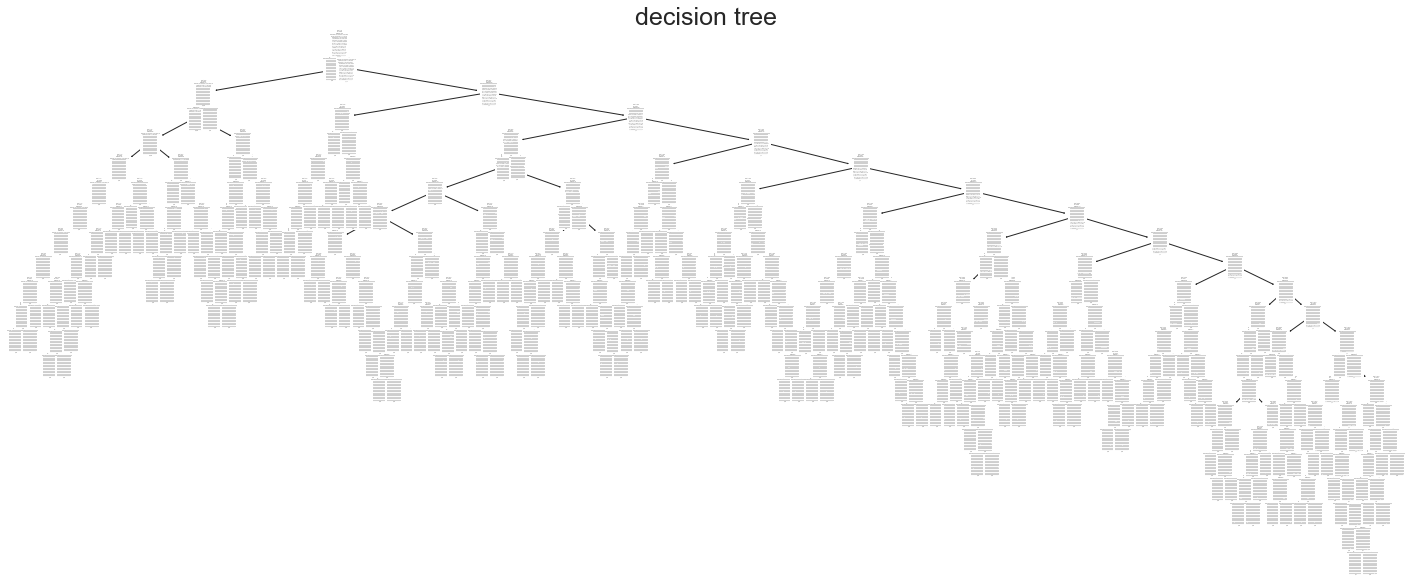

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (25,10))
plot_tree(dt)
plt.title("decision tree", fontsize = 25)

In [41]:
from sklearn.metrics import accuracy_score
print("decision tree accuracy is: {:.2f}".format(accuracy_score(y_test, y_pred)*100))

decision tree accuracy is: 88.99


In [42]:
bag = BaggingClassifier(n_estimators=100)
bag.fit(X_train, y_train)

C:\Users\kunda\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(n_estimators=100)

In [43]:
y_pred_bag = bag.predict(X_test)
y_pred_bag

array([1.20e+01, 1.00e+02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       3.00e+01, 1.50e+02, 0.00e+00, 0.00e+00, 4.00e+01, 1.00e+02,
       3.50e+01, 1.00e+01, 3.78e+02, 1.00e+02, 6.20e+01, 1.80e+01,
       0.00e+00, 6.50e+01, 7.60e+01, 0.00e+00, 3.10e+01, 3.00e+02,
       1.60e+02, 0.00e+00, 3.00e+01, 1.00e+02, 3.30e+01, 1.40e+02,
       0.00e+00, 0.00e+00, 2.80e+03, 3.50e+02, 5.00e+00, 4.50e+01,
       1.40e+02, 1.90e+02, 6.00e+01, 1.56e+02, 2.19e+02, 0.00e+00,
       6.00e+01, 1.50e+01, 5.00e+01, 0.00e+00, 1.80e+01, 1.43e+02,
       1.50e+02, 0.00e+00, 3.30e+01, 5.00e+01, 3.00e+01, 5.60e+01,
       0.00e+00, 0.00e+00, 5.80e+01, 2.00e+02, 3.00e+01, 1.90e+01,
       5.90e+01, 0.00e+00, 1.00e+02, 5.00e+02, 5.20e+01, 3.50e+01,
       9.00e+02, 1.11e+02, 1.30e+02, 0.00e+00, 4.50e+01, 5.00e+01,
       4.40e+01, 0.00e+00, 0.00e+00, 5.20e+02, 4.70e+02, 0.00e+00,
       1.60e+01, 0.00e+00, 4.00e+01, 0.00e+00, 7.30e+01, 1.00e+02,
       0.00e+00, 3.20e+01, 9.00e+01, 2.50e+01, 0.00e+00, 8.00e

In [44]:
print("Bagging accuracy score:{:.2f}".format(accuracy_score(y_test, y_pred_bag)*100))

Bagging accuracy score:89.57


In [45]:
rand = RandomForestClassifier()
rand.fit(X_train, y_train)

C:\Users\kunda\AppData\Local\Temp\ipykernel_6280\1329554029.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand.fit(X_train, y_train)


RandomForestClassifier()

In [46]:
y_pred_rand = rand.predict(X_test)
y_pred_rand

array([   5.,  100.,    0.,    0.,    0.,    0.,   30.,  227.,    0.,
          0.,   40.,  100.,   33.,   10.,  600.,  100.,   60.,   18.,
          0.,   62.,   75.,    0.,   31.,  350.,  150.,    0.,   30.,
        100.,   35.,  150.,    0.,    0.,  784.,  800.,   13.,   45.,
        130.,  180.,   45.,  170.,  750.,    0.,   80.,   13.,   50.,
          0.,   20.,  138.,  140.,    0.,   35.,   50.,   30.,   58.,
          0.,    0.,   58.,  200.,   30.,   17.,   57.,    0.,  100.,
        500.,   50.,   35.,  250.,  111.,  137.,    0.,   45.,   50.,
        101.,    0.,    0.,  270.,  400.,    0.,   15.,    0.,   40.,
          0.,   73.,  100.,    0.,   31.,  100.,   25.,    0.,   10.,
         60.,    0.,   20.,    0.,   30.,    0.,   60.,    0.,    0.,
        100.,   70.,    0.,    0.,    0.,   40.,    6.,  750.,   52.,
          0.,   24.,  250.,  300.,    0.,   57., 3700.,  200.,   80.,
        110.,  250.,   83.,  340.,    0.,    0.,   90.,  784.,    0.,
         50.,  350.,

In [47]:
print("random forest accuracy is: {:.2f}". format(accuracy_score(y_test, y_pred_rand)*100))

random forest accuracy is: 57.10


In [48]:
print("decision tree accuracy is: {:.2f}".format(accuracy_score(y_test, y_pred)*100))
print("Bagging accuracy score:{:.2f}".format(accuracy_score(y_test, y_pred_bag)*100))
print("random forest accuracy is: {:.2f}". format(accuracy_score(y_test, y_pred_rand)*100))

decision tree accuracy is: 88.99
Bagging accuracy score:89.57
random forest accuracy is: 57.10
